In [1]:
# import libraries
import pandas as pd
import requests
import io
# import emoji
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from emoji import UNICODE_EMOJI

# download nltk corpus (first time only)
# import nltk

# nltk.download('all')

url = 'https://drive.google.com/file/d/1rs6LBRV7QooT73LmYe45JxVQSL06uIvI/view?usp=sharing'
file_id = url.split('/')[-2]
print(file_id)
download_url = f'https://drive.google.com/uc?id={file_id}'

# Bypass SSL certificate verification
response = requests.get(download_url, verify=False)

# Create a file-like object from the response content
csv_data = io.BytesIO(response.content)

# Read the CSV data into a DataFrame
data = pd.read_csv(csv_data)
# data

1rs6LBRV7QooT73LmYe45JxVQSL06uIvI


C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-14-8g-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error,type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:19:29.760Z,https://www.instagram.com/p/Cs20Fd_uSvJ/,No comments found,creamier
1,https://scontent.cdninstagram.com/v/t51.2885-1...,swizzyinsg,https://www.instagram.com/swizzyinsg,Look great!â˜ºï¸,1.0,0.0,2023-06-24T06:18:46.000Z,1.799630e+16,5.763184e+10,2023-10-19T05:19:41.612Z,https://www.instagram.com/p/Ct2-EZJt7bE/,NaN,creamier
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:19:53.658Z,https://www.instagram.com/p/Cyi8Q4RPMyI/,No comments found,creamier
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:00.019Z,https://www.instagram.com/p/CyfFoKeuczb/,No comments found,creamier
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:06.626Z,https://www.instagram.com/p/CyZ7-qIOv6u/,No comments found,creamier
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:12.877Z,https://www.instagram.com/p/CyVRXDqOmHw/,No comments found,creamier
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:19.166Z,https://www.instagram.com/p/CyPo0z-uIFk/,No comments found,creamier
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:25.869Z,https://www.instagram.com/p/CyNUN7lyENA/,No comments found,creamier
8,https://scontent.cdninstagram.com/v/t51.2885-1...,anna_m_gabriel,https://www.instagram.com/anna_m_gabriel,@keanununissg1754p â€¦Letâ€™s go there tomorro...,0.0,0.0,2023-10-09T09:48:47.000Z,1.798790e+16,4.310543e+09,2023-10-19T05:20:37.682Z,https://www.instagram.com/p/CyLFBo-Sf3E/,NaN,creamier
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:20:49.984Z,https://www.instagram.com/p/CyDYSOYSHRB/,No comments found,creamier


In [3]:
data = data.drop(['error'], axis=1)
data = data.dropna(axis=0, how='any')
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
1,https://scontent.cdninstagram.com/v/t51.2885-1...,swizzyinsg,https://www.instagram.com/swizzyinsg,Look great!â˜ºï¸,1.0,0.0,2023-06-24T06:18:46.000Z,1.799630e+16,5.763184e+10,2023-10-19T05:19:41.612Z,https://www.instagram.com/p/Ct2-EZJt7bE/,creamier
8,https://scontent.cdninstagram.com/v/t51.2885-1...,anna_m_gabriel,https://www.instagram.com/anna_m_gabriel,@keanununissg1754p â€¦Letâ€™s go there tomorro...,0.0,0.0,2023-10-09T09:48:47.000Z,1.798790e+16,4.310543e+09,2023-10-19T05:20:37.682Z,https://www.instagram.com/p/CyLFBo-Sf3E/,creamier
10,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,@12andone letâ€™s goðŸ¤°,3.0,1.0,2023-10-06T12:16:24.000Z,1.789810e+16,5.941552e+09,2023-10-19T05:21:02.030Z,https://www.instagram.com/p/CyAMBLxyBhK/,creamier
13,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,â¤ï¸â¤ï¸â¤ï¸wow,0.0,0.0,2023-09-16T01:45:58.000Z,1.826140e+16,5.385261e+10,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier
14,https://scontent.cdninstagram.com/v/t51.2885-1...,elloelly_,https://www.instagram.com/elloelly_,ðŸ˜ðŸ˜ðŸ˜,0.0,0.0,2023-09-15T11:48:22.000Z,1.828670e+16,3.965688e+10,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier
15,https://scontent.cdninstagram.com/v/t51.2885-1...,julypancakes,https://www.instagram.com/julypancakes,!!,0.0,0.0,2023-09-15T06:09:24.000Z,1.799590e+16,2.461816e+08,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier
16,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,ðŸ”¥wow ðŸ¨,0.0,0.0,2023-09-16T13:49:39.000Z,1.790750e+16,5.385261e+10,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
17,https://scontent.cdninstagram.com/v/t51.2885-1...,miracle82,https://www.instagram.com/miracle82,@emaylye,0.0,1.0,2023-09-14T10:17:16.000Z,1.812100e+16,4.747294e+06,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
18,https://scontent.cdninstagram.com/v/t51.2885-1...,chiaksimi,https://www.instagram.com/chiaksimi,Yummy,0.0,0.0,2023-09-10T16:12:36.000Z,1.788810e+16,4.441726e+10,2023-10-19T05:22:07.208Z,https://www.instagram.com/p/CxBE55eSA25/,creamier
20,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,Tomato monster!,0.0,0.0,2023-09-06T09:54:55.000Z,1.800920e+16,5.941552e+09,2023-10-19T05:22:31.272Z,https://www.instagram.com/p/Cw2BEpvO-_M/,creamier


In [4]:
#filter the comments which contains emojis out
data['comment'] = data['comment'].str.replace('[^A-Za-z0-9\s]', '', flags=re.UNICODE)
filtered_data = data[data['comment'].str.len() > 0]

filtered_data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
1,https://scontent.cdninstagram.com/v/t51.2885-1...,swizzyinsg,https://www.instagram.com/swizzyinsg,Look great,1.0,0.0,2023-06-24T06:18:46.000Z,1.799630e+16,5.763184e+10,2023-10-19T05:19:41.612Z,https://www.instagram.com/p/Ct2-EZJt7bE/,creamier
8,https://scontent.cdninstagram.com/v/t51.2885-1...,anna_m_gabriel,https://www.instagram.com/anna_m_gabriel,keanununissg1754p Lets go there tomorrow to ce...,0.0,0.0,2023-10-09T09:48:47.000Z,1.798790e+16,4.310543e+09,2023-10-19T05:20:37.682Z,https://www.instagram.com/p/CyLFBo-Sf3E/,creamier
10,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,12andone lets go,3.0,1.0,2023-10-06T12:16:24.000Z,1.789810e+16,5.941552e+09,2023-10-19T05:21:02.030Z,https://www.instagram.com/p/CyAMBLxyBhK/,creamier
13,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T01:45:58.000Z,1.826140e+16,5.385261e+10,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier
16,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T13:49:39.000Z,1.790750e+16,5.385261e+10,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
17,https://scontent.cdninstagram.com/v/t51.2885-1...,miracle82,https://www.instagram.com/miracle82,emaylye,0.0,1.0,2023-09-14T10:17:16.000Z,1.812100e+16,4.747294e+06,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
18,https://scontent.cdninstagram.com/v/t51.2885-1...,chiaksimi,https://www.instagram.com/chiaksimi,Yummy,0.0,0.0,2023-09-10T16:12:36.000Z,1.788810e+16,4.441726e+10,2023-10-19T05:22:07.208Z,https://www.instagram.com/p/CxBE55eSA25/,creamier
20,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,Tomato monster,0.0,0.0,2023-09-06T09:54:55.000Z,1.800920e+16,5.941552e+09,2023-10-19T05:22:31.272Z,https://www.instagram.com/p/Cw2BEpvO-_M/,creamier
22,https://scontent.cdninstagram.com/v/t51.2885-1...,sherminwu,https://www.instagram.com/sherminwu,Pls restock sesame tang yuan at toa payoh outl...,0.0,0.0,2023-09-03T10:49:42.000Z,1.804480e+16,1.169571e+07,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier
23,https://scontent.cdninstagram.com/v/t51.2885-1...,lim_chloe,https://www.instagram.com/lim_chloe,Pls restock Putu Piring and Earl Grey Lychee p...,0.0,0.0,2023-09-04T07:21:57.000Z,1.797790e+16,6.305010e+08,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier


In [5]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)
filtered_data

<ipython-input-5-28a879573750>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
1,https://scontent.cdninstagram.com/v/t51.2885-1...,swizzyinsg,https://www.instagram.com/swizzyinsg,look great,1.0,0.0,2023-06-24T06:18:46.000Z,1.799630e+16,5.763184e+10,2023-10-19T05:19:41.612Z,https://www.instagram.com/p/Ct2-EZJt7bE/,creamier
8,https://scontent.cdninstagram.com/v/t51.2885-1...,anna_m_gabriel,https://www.instagram.com/anna_m_gabriel,keanununissg1754p let go tomorrow celebrate,0.0,0.0,2023-10-09T09:48:47.000Z,1.798790e+16,4.310543e+09,2023-10-19T05:20:37.682Z,https://www.instagram.com/p/CyLFBo-Sf3E/,creamier
10,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,12andone let go,3.0,1.0,2023-10-06T12:16:24.000Z,1.789810e+16,5.941552e+09,2023-10-19T05:21:02.030Z,https://www.instagram.com/p/CyAMBLxyBhK/,creamier
13,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T01:45:58.000Z,1.826140e+16,5.385261e+10,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier
16,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T13:49:39.000Z,1.790750e+16,5.385261e+10,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
17,https://scontent.cdninstagram.com/v/t51.2885-1...,miracle82,https://www.instagram.com/miracle82,emaylye,0.0,1.0,2023-09-14T10:17:16.000Z,1.812100e+16,4.747294e+06,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier
18,https://scontent.cdninstagram.com/v/t51.2885-1...,chiaksimi,https://www.instagram.com/chiaksimi,yummy,0.0,0.0,2023-09-10T16:12:36.000Z,1.788810e+16,4.441726e+10,2023-10-19T05:22:07.208Z,https://www.instagram.com/p/CxBE55eSA25/,creamier
20,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,tomato monster,0.0,0.0,2023-09-06T09:54:55.000Z,1.800920e+16,5.941552e+09,2023-10-19T05:22:31.272Z,https://www.instagram.com/p/Cw2BEpvO-_M/,creamier
22,https://scontent.cdninstagram.com/v/t51.2885-1...,sherminwu,https://www.instagram.com/sherminwu,pls restock sesame tang yuan toa payoh outlet ...,0.0,0.0,2023-09-03T10:49:42.000Z,1.804480e+16,1.169571e+07,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier
23,https://scontent.cdninstagram.com/v/t51.2885-1...,lim_chloe,https://www.instagram.com/lim_chloe,pls restock putu piring earl grey lychee pint,0.0,0.0,2023-09-04T07:21:57.000Z,1.797790e+16,6.305010e+08,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier


In [6]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function

filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)
filtered_data

<ipython-input-6-8b2913775384>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type,sentiment
1,https://scontent.cdninstagram.com/v/t51.2885-1...,swizzyinsg,https://www.instagram.com/swizzyinsg,look great,1.0,0.0,2023-06-24T06:18:46.000Z,1.799630e+16,5.763184e+10,2023-10-19T05:19:41.612Z,https://www.instagram.com/p/Ct2-EZJt7bE/,creamier,1
8,https://scontent.cdninstagram.com/v/t51.2885-1...,anna_m_gabriel,https://www.instagram.com/anna_m_gabriel,keanununissg1754p let go tomorrow celebrate,0.0,0.0,2023-10-09T09:48:47.000Z,1.798790e+16,4.310543e+09,2023-10-19T05:20:37.682Z,https://www.instagram.com/p/CyLFBo-Sf3E/,creamier,1
10,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,12andone let go,3.0,1.0,2023-10-06T12:16:24.000Z,1.789810e+16,5.941552e+09,2023-10-19T05:21:02.030Z,https://www.instagram.com/p/CyAMBLxyBhK/,creamier,0
13,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T01:45:58.000Z,1.826140e+16,5.385261e+10,2023-10-19T05:21:32.595Z,https://www.instagram.com/p/CxMu7eDyDPZ/,creamier,1
16,https://scontent.cdninstagram.com/v/t51.2885-1...,makan.tour.yuk,https://www.instagram.com/makan.tour.yuk,wow,0.0,0.0,2023-09-16T13:49:39.000Z,1.790750e+16,5.385261e+10,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier,1
17,https://scontent.cdninstagram.com/v/t51.2885-1...,miracle82,https://www.instagram.com/miracle82,emaylye,0.0,1.0,2023-09-14T10:17:16.000Z,1.812100e+16,4.747294e+06,2023-10-19T05:21:50.184Z,https://www.instagram.com/p/CxHigrySe-8/,creamier,0
18,https://scontent.cdninstagram.com/v/t51.2885-1...,chiaksimi,https://www.instagram.com/chiaksimi,yummy,0.0,0.0,2023-09-10T16:12:36.000Z,1.788810e+16,4.441726e+10,2023-10-19T05:22:07.208Z,https://www.instagram.com/p/CxBE55eSA25/,creamier,1
20,https://scontent.cdninstagram.com/v/t51.2885-1...,tomatojouce,https://www.instagram.com/tomatojouce,tomato monster,0.0,0.0,2023-09-06T09:54:55.000Z,1.800920e+16,5.941552e+09,2023-10-19T05:22:31.272Z,https://www.instagram.com/p/Cw2BEpvO-_M/,creamier,0
22,https://scontent.cdninstagram.com/v/t51.2885-1...,sherminwu,https://www.instagram.com/sherminwu,pls restock sesame tang yuan toa payoh outlet ...,0.0,0.0,2023-09-03T10:49:42.000Z,1.804480e+16,1.169571e+07,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier,1
23,https://scontent.cdninstagram.com/v/t51.2885-1...,lim_chloe,https://www.instagram.com/lim_chloe,pls restock putu piring earl grey lychee pint,0.0,0.0,2023-09-04T07:21:57.000Z,1.797790e+16,6.305010e+08,2023-10-19T05:22:48.270Z,https://www.instagram.com/p/CwtylERSN6Q/,creamier,1


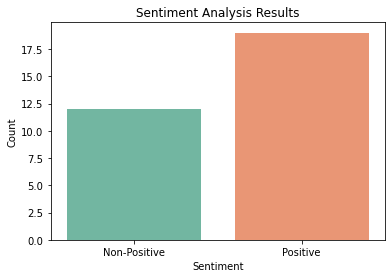

In [7]:
#Visualisation1
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = filtered_data['sentiment'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.xticks(ticks=[0, 1], labels=['Non-Positive', 'Positive'])
plt.show()

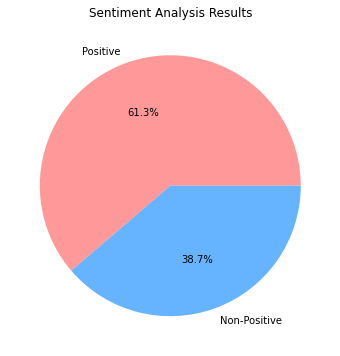

In [9]:
#Visualisation 2
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=['Positive', 'Non-Positive'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sentiment Analysis Results')
plt.show()